In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mengimpor semua library yang diperlukan
# pandas digunakan untuk memanipulasi dan menganalisis data dalam bentuk DataFrame
# matplotlib.pyplot digunakan untuk membuat visualisasi grafik
# numpy digunakan untuk operasi matematika dan manipulasi array

# Mengatur jumlah maksimum baris yang ditampilkan saat mencetak DataFrame
pd.options.display.max_rows

# Mengatur jumlah maksimum kolom yang ditampilkan saat mencetak DataFrame
pd.options.display.max_columns

# Mengatur lebar maksimum kolom agar setiap kolom dapat menampilkan string hingga 75 karakter
pd.options.display.max_colwidth = 100


## **Preprocessing Dataset 1 (Tanpa Augmentasi)**

<ol>
  <li>Case Folding</li>
  <li>Tokenizing</li>
  <li>Stopwords Removal</li>
  <li>Stemming</li>
</ol>


In [2]:
# Mendefinisikan path file CSV yang akan dibaca
path = "../dataset/INA_TweetsPPKM_Labeled_PosNeg.csv"

# Membaca file CSV menjadi DataFrame menggunakan pandas
df = pd.read_csv(path, sep="\t")

# Mencetak jumlah baris dan kolom dalam DataFrame
print(f"Rows : {df.shape[0]}, Columns : {df.shape[1]}")


Rows : 5938, Columns : 4


In [3]:
# Mengubah semua nama kolom dalam DataFrame menjadi huruf kecil
df.columns = df.columns.str.lower()

# Mengambil sampel acak 5 baris dari DataFrame
df.sample(5)


,date,user,tweet,sentiment
4099,2021-07-14 12:34:29+00:00,norma_manes,Tempat ibadah di tutup!!\nTempat vaksin di serbu tanpa protokol. Ini mencegah atau menambah peny...,0
3668,2021-07-17 11:18:45+00:00,Oco09M,Ya gimana yaa\n\n#PPKMSengsarakanRakyat. #ppkm https://t.co/s4opxVtzVC,0
872,2021-08-20 04:48:31+00:00,akengg,#PPKM di indo pasti menyusul sampe akhir september… enjoy.. https://t.co/0Cvjavxe9H,1
3606,2021-07-17 21:58:51+00:00,Luthfimuqodas1,Ngalamin juga disidang kapan nikah sama bonyok 😂. Duh lagi #PPKM Gini mah jangannya nyari cewe. ...,0
1289,2021-08-11 08:27:07+00:00,kangkungijoo,"#PPKM versi aku,belajar online sambil sosmedan tapi ga ngebosenin karena aku pakai smartfren Gok...",1


In [4]:
# Menghitung jumlah nilai yang hilang (NaN) pada setiap kolom dalam DataFrame
df.isna().sum()


date         0
user         0
tweet        0
sentiment    0
dtype: int64

In [5]:
# Menampilkan informasi tentang DataFrame, termasuk informasi tentang kolom, tipe data, dan jumlah non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5938 non-null   object
 1   user       5938 non-null   object
 2   tweet      5938 non-null   object
 3   sentiment  5938 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 185.7+ KB


In [6]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'sentiment' dalam DataFrame
df["sentiment"].value_counts()


0    3980
1    1958
Name: sentiment, dtype: int64

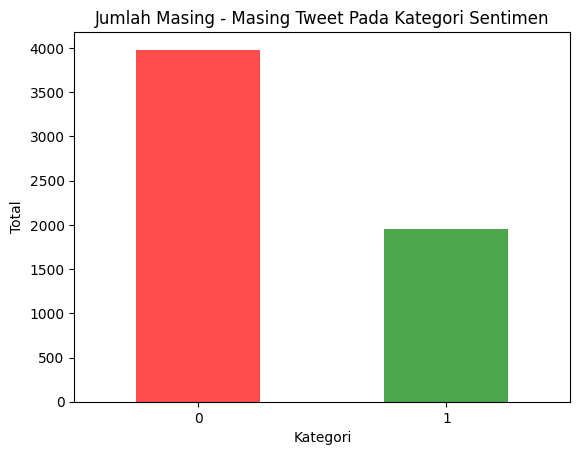

In [7]:
# Mengelompokkan DataFrame berdasarkan kolom 'sentiment' dan menghitung jumlah kemunculan setiap nilai sentiment
sentiment_df = df.groupby("sentiment")["sentiment"].count()

# Membuat peta warna untuk representasi visual, di mana 0 direpresentasikan sebagai "red" dan 1 direpresentasikan sebagai "green"
color_map = {0: "red", 1: "green"}

# Membuat plot bar dengan menggunakan data dari sentiment_df, dengan warna yang sesuai dengan peta warna
sentiment_df.plot(kind="bar", alpha=0.7, color=["red", "green"])

# Menambahkan label pada sumbu x dengan teks "Kategori"
plt.xlabel("Kategori")

# Mengatur rotasi label sumbu x menjadi 0 (tidak berputar)
plt.xticks(rotation=0)

# Menambahkan label pada sumbu y dengan teks "Total"
plt.ylabel("Total")

# Menambahkan judul pada plot dengan teks "Jumlah Masing - Masing Kategori Sentimen"
plt.title("Jumlah Masing - Masing Tweet Pada Kategori Sentimen")
plt.show()


### **Case Folding**


In [8]:
# Mengubah semua teks dalam kolom 'tweet' menjadi huruf kecil
df["tweet"] = df["tweet"].str.lower()

# Mencetak hasil dari Case Folding
print("Case Folding Result:")

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan Case Folding
df.head(5)


Case Folding Result:


,date,user,tweet,sentiment
0,2022-03-26 04:51:44+00:00,CendekiaDelapan,karena stimulasi untuk #anakberkebutuhankhusus tidak optimal jika dilakukan secara online.\n. \n...,0
1,2022-03-25 10:13:26+00:00,AnantaElvano,hadir kembali boss!! mega win dari https://t.co/3ge7hbt18k jackpot jutaan rupiah serta kemenanga...,1
2,2022-03-23 23:15:45+00:00,mitrafmpwt,hayolohhhhhhhhh... seneng kannnn??\n\n#covid19\n#corona\n#pcr\n#ppkm\n#radio\n#radiopurwokerto h...,1
3,2022-03-23 10:29:52+00:00,895jizfm,thank you teman-teman dari #saganheritagehotel udah mampir ngobrol-ngobrol bareng @felisenyum te...,1
4,2022-03-22 17:25:29+00:00,ViantAntony,ruwet ruwet ruwet inilah negeri ruwetnesia. hebatnya virus itu adalah dia tau ramadhan akn datan...,1


### **Tokenizing**


In [9]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Mengunduh resource yang diperlukan oleh NLTK (Natural Language Toolkit)
nltk.download("punkt")


[nltk_data] Downloading package punkt to C:\Users\SNOW-
[nltk_data]     WOLF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def remove_special_char(text):
    # Menghapus karakter khusus seperti tab, baris baru, dan backslash
    text = (
        text.replace("\\t", " ")
        .replace("\\n", " ")
        .replace("\\u", " ")
        .replace("\\", "")
    )
    # Menghapus karakter non-ASCII seperti emotikon
    text = text.encode("ASCII", "replace").decode("ASCII")
    # Menghapus mention, link, dan hashtag
    text = " ".join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Menghapus URL yang tidak lengkap
    return text.replace("http://", " ").replace("https://", " ")


def remove_number(text):
    # Menghapus angka dari teks
    return re.sub(r"\d+", "", text)


def remove_punctuation(text):
    # Menghapus tanda baca dari teks
    return text.translate(str.maketrans("", "", string.punctuation))


def remove_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    return text.strip()


def remove_multiple_whitespace(text):
    # Menghapus multiple whitespace menjadi satu spasi
    return re.sub("\s+", " ", text)


def remove_single_char(text):
    # Menghapus kata yang terdiri dari satu karakter saja
    return re.sub(r"\b[a-zA-Z]\b", "", text)


def tokenize(text):
    # Melakukan tokenisasi kata pada teks menggunakan NLTK
    return word_tokenize(text)


In [11]:
# Mengaplikasikan fungsi remove_special_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_special_char)

# Mengaplikasikan fungsi remove_number pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_number)

# Mengaplikasikan fungsi remove_punctuation pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_punctuation)

# Mengaplikasikan fungsi remove_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_whitespace)

# Mengaplikasikan fungsi remove_multiple_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_multiple_whitespace)

# Mengaplikasikan fungsi remove_single_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_single_char)

# Mengaplikasikan fungsi tokenize pada kolom 'tweet'
df["tweet"] = df["tweet"].map(tokenize)

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan preprocessing teks
df.head()


,date,user,tweet,sentiment
0,2022-03-26 04:51:44+00:00,CendekiaDelapan,"[karena, stimulasi, untuk, tidak, optimal, jika, dilakukan, secara, online, untuk, memenuhi, keb...",0
1,2022-03-25 10:13:26+00:00,AnantaElvano,"[hadir, kembali, boss, mega, win, dari, jackpot, jutaan, rupiah, serta, kemenangan, extra, menan...",1
2,2022-03-23 23:15:45+00:00,mitrafmpwt,"[hayolohhhhhhhhh, seneng, kannnn]",1
3,2022-03-23 10:29:52+00:00,895jizfm,"[thank, you, temanteman, dari, udah, mampir, ngobrolngobrol, bareng, tentang, promo, paket, buka...",1
4,2022-03-22 17:25:29+00:00,ViantAntony,"[ruwet, ruwet, ruwet, inilah, negeri, ruwetnesia, hebatnya, virus, itu, adalah, dia, tau, ramadh...",1


### **Stopwords Removal**


In [12]:
from nltk.corpus import stopwords

# Mengunduh resource stopwords dari NLTK
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to C:\Users\SNOW-
[nltk_data]     WOLF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()

# Mendapatkan daftar stopwords dari factory
stopwords = factory.get_stop_words()

# Mencetak stopwords yang telah diurutkan secara alfabetis
print(sorted(stopwords))


['ada', 'adalah', 'agak', 'agar', 'akan', 'amat', 'anda', 'antara', 'anu', 'apakah', 'apalagi', 'atau', 'bagaimanapun', 'bagi', 'bahwa', 'begitu', 'belum', 'bisa', 'boleh', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'demi', 'demikian', 'dengan', 'di', 'dia', 'dimana', 'dll', 'dsb', 'dst', 'dua', 'dulunya', 'guna', 'hal', 'hanya', 'harus', 'ia', 'ingin', 'ini', 'itu', 'itulah', 'jika', 'jika', 'juga', 'juga', 'kah', 'kami', 'karena', 'ke', 'kecuali', 'kemana', 'kembali', 'kenapa', 'kepada', 'ketika', 'kita', 'lagi', 'lain', 'maka', 'mari', 'masih', 'melainkan', 'mengapa', 'menurut', 'mereka', 'namun', 'nanti', 'nggak', 'oh', 'ok', 'oleh', 'pada', 'para', 'pasti', 'pula', 'pun', 'saat', 'saja', 'sambil', 'sampai', 'saya', 'sebab', 'sebagai', 'sebelum', 'sebetulnya', 'secara', 'sedangkan', 'seharusnya', 'sehingga', 'sekitar', 'selagi', 'selain', 'sementara', 'sementara', 'seolah', 'seperti', 'seraya', 'serta', 'sesuatu', 'sesudah', 'setelah', 'seterusnya', 'setiap', 'setidakny

In [14]:
def stopwords_removal(words):
    # Menerapkan filter stopwords pada kata-kata dalam teks
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words


# Mengaplikasikan fungsi stopwords_removal pada kolom 'tweet'
df["tweet"] = df["tweet"].map(stopwords_removal)

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan stopwords removal
df.head()


,date,user,tweet,sentiment
0,2022-03-26 04:51:44+00:00,CendekiaDelapan,"[stimulasi, optimal, dilakukan, online, memenuhi, kebutuhan, tersebut, tetap, beroperasi, sesuai...",0
1,2022-03-25 10:13:26+00:00,AnantaElvano,"[hadir, boss, mega, win, jackpot, jutaan, rupiah, kemenangan, extra, menanti, salam, wd, wa]",1
2,2022-03-23 23:15:45+00:00,mitrafmpwt,"[hayolohhhhhhhhh, seneng, kannnn]",1
3,2022-03-23 10:29:52+00:00,895jizfm,"[thank, you, temanteman, udah, mampir, ngobrolngobrol, bareng, promo, paket, buka, puasa, kenyan...",1
4,2022-03-22 17:25:29+00:00,ViantAntony,"[ruwet, ruwet, ruwet, inilah, negeri, ruwetnesia, hebatnya, virus, tau, ramadhan, akn, datang, m...",1


### **Without Stemming**


In [17]:
# Menyimpan DataFrame ke dalam dataset tanpa stemming untuk dibandingkan nanti dengan yang sudah dilakukan stemming
df.to_csv(
    "../dataset/INA_TweetsPPKM_Preprocessed_DS1_NoStem.csv",
    index=False,
    header="true",
    encoding="utf-8",
    sep="\t",
)

# Menampilkan informasi tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5938 non-null   object
 1   user       5938 non-null   object
 2   tweet      5938 non-null   object
 3   sentiment  5938 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 185.7+ KB


### **Stemming**


In [15]:
# Melakukan stemming pada dataset untuk mendapatkan kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [16]:
def stemming_words(words):
    # Melakukan stemming pada setiap kata dalam daftar kata
    return [stemmer.stem(word) for word in words]


# Proses stemming
df["tweet"] = df["tweet"].map(stemming_words)


In [17]:
df.head()


,date,user,tweet,sentiment
0,2022-03-26 04:51:44+00:00,CendekiaDelapan,"[stimulasi, optimal, laku, online, penuh, butuh, sebut, tetap, operasi, sesuai, atur, dgn, jaga,...",0
1,2022-03-25 10:13:26+00:00,AnantaElvano,"[hadir, boss, mega, win, jackpot, juta, rupiah, menang, extra, nanti, salam, wd, wa]",1
2,2022-03-23 23:15:45+00:00,mitrafmpwt,"[hayolohhhhhhhhh, neng, kannnn]",1
3,2022-03-23 10:29:52+00:00,895jizfm,"[thank, you, temanteman, udah, mampir, ngobrolngobrol, bareng, promo, paket, buka, puasa, kenyan...",1
4,2022-03-22 17:25:29+00:00,ViantAntony,"[ruwet, ruwet, ruwet, ini, negeri, ruwetnesia, hebat, virus, tau, ramadhan, akn, datang, raka, a...",1


- **WordCloud For Non Augmented Data**


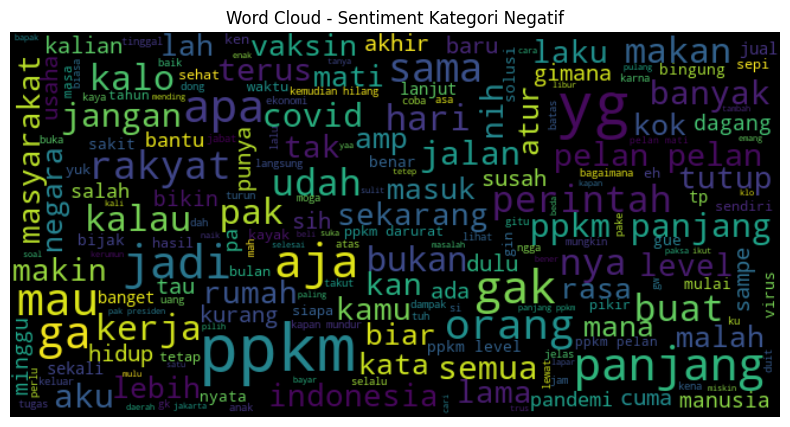

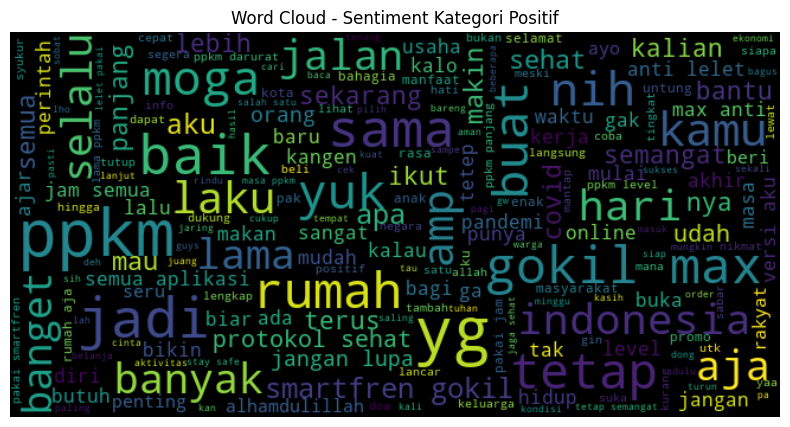

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds based on sentiment categories
sentiment_categories = df["sentiment"].unique()

for category in sentiment_categories:
    category_tokens = [
        word for tweets in df[df["sentiment"] == category]["tweet"] for word in tweets
    ]
    wordcloud = WordCloud(
       height=325
       
       
       ,width=650,background_color="black", max_font_size=55
    ).generate(" ".join(category_tokens))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    if category == 0:
        plt.title(f"Word Cloud - Sentiment Kategori Negatif")
    else:
        plt.title(f"Word Cloud - Sentiment Kategori Positif")
    plt.axis("off")
    plt.show()


- **Save To CSV**


In [25]:
# Menyimpan DataFrame ke dalam dataset baru
save_path = "../dataset/INA_TweetsPPKM_Preprocessed_DS1.csv"  # Path dan nama file untuk dataset baru
df.to_csv(
    save_path,  # Menyimpan DataFrame ke file CSV dengan path yang ditentukan
    index=False,  # Tidak menyertakan index saat menyimpan ke file
    header="true",  # Menyertakan header kolom saat menyimpan ke file
    encoding="utf-8",  # Menggunakan encoding UTF-8 untuk menyimpan teks Unicode
    sep="\t",  # Menggunakan "\t" sebagai pemisah antar kolom dalam file CSV
)

# Menampilkan informasi tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5938 non-null   object
 1   user       5938 non-null   object
 2   tweet      5938 non-null   object
 3   sentiment  5938 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 185.7+ KB


## **Preprocessing Dataset 2 (Augmentasi)**

<ol>
  <li>Case Folding</li>
  <li>Tokenizing</li>
  <li>Stopwords Removal</li>
  <li>Stemming</li>
</ol>


In [3]:
# Mendefinisikan path file CSV yang akan dibaca
path = "../dataset/INA_TweetsPPKM_LabeledSubstitute_Augmented.csv"

# Membaca file CSV menjadi DataFrame menggunakan pandas
df = pd.read_csv(path, sep="\t")

# Mencetak jumlah baris dan kolom dalam DataFrame
print(f"Rows : {df.shape[0]}, Columns : {df.shape[1]}")


Rows : 7896, Columns : 2


In [4]:
# Mengubah semua nama kolom dalam DataFrame menjadi huruf kecil
df.columns = df.columns.str.lower()

# Mengambil sampel acak 5 baris dari DataFrame
df.head(5)


,tweet,sentiment
0,Hadir Kembali Boss!! MEGA WIN Dari https://t.co/3ge7hBt18k Jackpot Jutaan Rupiah Serta Kemenanga...,1
1,Hayolohhhhhhhhh... seneng kannnn??\n\n#covid19\n#Corona\n#PCR\n#PPKM\n#Radio\n#RadioPurwokerto h...,1
2,Thank You teman-teman dari #saganheritagehotel udah mampir ngobrol-ngobrol bareng @felisenyum te...,1
3,Ruwet Ruwet Ruwet inilah Negeri RuwetNesia. Hebatnya Virus itu adalah dia tau Ramadhan akn datan...,1
4,Film bagus nih karya habaib. Tonton dah.\n\n#mk #selasa #tempe #bareskrim #ppkm\n\nhttps://t.co/...,1


In [6]:
# Menghitung jumlah nilai yang hilang (NaN) pada setiap kolom dalam DataFrame
df.isna().sum()


tweet        0
sentiment    0
dtype: int64

In [7]:
# Menampilkan informasi tentang DataFrame, termasuk informasi tentang kolom, tipe data, dan jumlah non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      7896 non-null   object
 1   sentiment  7896 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.5+ KB


In [8]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'sentiment' dalam DataFrame
df["sentiment"].value_counts()


0    3980
1    3916
Name: sentiment, dtype: int64

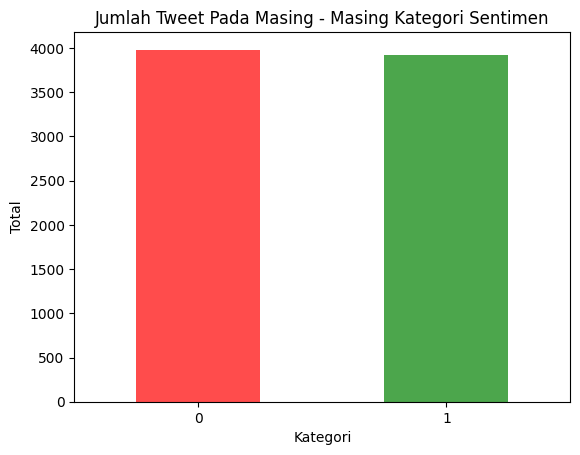

In [9]:
# Mengelompokkan DataFrame berdasarkan kolom 'sentiment' dan menghitung jumlah kemunculan setiap nilai sentiment
sentiment_df = df.groupby("sentiment")["sentiment"].count()

# Membuat peta warna untuk representasi visual, di mana 0 direpresentasikan sebagai "red" dan 1 direpresentasikan sebagai "green"
color_map = {0: "red", 1: "green"}

# Membuat plot bar dengan menggunakan data dari sentiment_df, dengan warna yang sesuai dengan peta warna
sentiment_df.plot(kind="bar", alpha=0.7, color=["red", "green"])

# Menambahkan label pada sumbu x dengan teks "Kategori"
plt.xlabel("Kategori")

# Mengatur rotasi label sumbu x menjadi 0 (tidak berputar)
plt.xticks(rotation=0)

# Menambahkan label pada sumbu y dengan teks "Total"
plt.ylabel("Total")

# Menambahkan judul pada plot dengan teks "Jumlah Masing - Masing Kategori Sentimen"
plt.title("Jumlah Tweet Pada Masing - Masing Kategori Sentimen")
plt.show()


### **Case Folding**


In [10]:
# Mengubah semua teks dalam kolom 'tweet' menjadi huruf kecil
df["tweet"] = df["tweet"].str.lower()

# Mencetak hasil dari Case Folding
print("Case Folding Result:")

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan Case Folding
df.head(5)


Case Folding Result:


,tweet,sentiment
0,hadir kembali boss!! mega win dari https://t.co/3ge7hbt18k jackpot jutaan rupiah serta kemenanga...,1
1,hayolohhhhhhhhh... seneng kannnn??\n\n#covid19\n#corona\n#pcr\n#ppkm\n#radio\n#radiopurwokerto h...,1
2,thank you teman-teman dari #saganheritagehotel udah mampir ngobrol-ngobrol bareng @felisenyum te...,1
3,ruwet ruwet ruwet inilah negeri ruwetnesia. hebatnya virus itu adalah dia tau ramadhan akn datan...,1
4,film bagus nih karya habaib. tonton dah.\n\n#mk #selasa #tempe #bareskrim #ppkm\n\nhttps://t.co/...,1


### **Tokenizing**


In [11]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize

# Mengunduh resource yang diperlukan oleh NLTK (Natural Language Toolkit)
nltk.download("punkt")


[nltk_data] Downloading package punkt to C:\Users\SNOW-
[nltk_data]     WOLF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def remove_special_char(text):
    # Menghapus karakter khusus seperti tab, baris baru, dan backslash
    text = (
        text.replace("\\t", " ")
        .replace("\\n", " ")
        .replace("\\u", " ")
        .replace("\\", "")
    )
    # Menghapus karakter non-ASCII seperti emotikon
    text = text.encode("ASCII", "replace").decode("ASCII")
    # Menghapus mention, link, dan hashtag
    text = " ".join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Menghapus URL yang tidak lengkap
    return text.replace("http://", " ").replace("https://", " ")


def remove_number(text):
    # Menghapus angka dari teks
    return re.sub(r"\d+", "", text)


def remove_punctuation(text):
    # Menghapus tanda baca dari teks
    return text.translate(str.maketrans("", "", string.punctuation))


def remove_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    return text.strip()


def remove_multiple_whitespace(text):
    # Menghapus multiple whitespace menjadi satu spasi
    return re.sub("\s+", " ", text)


def remove_single_char(text):
    # Menghapus kata yang terdiri dari satu karakter saja
    return re.sub(r"\b[a-zA-Z]\b", "", text)


def tokenize(text):
    # Melakukan tokenisasi kata pada teks menggunakan NLTK
    return word_tokenize(text)


In [13]:
# Mengaplikasikan fungsi remove_special_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_special_char)

# Mengaplikasikan fungsi remove_number pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_number)

# Mengaplikasikan fungsi remove_punctuation pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_punctuation)

# Mengaplikasikan fungsi remove_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_whitespace)

# Mengaplikasikan fungsi remove_multiple_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_multiple_whitespace)

# Mengaplikasikan fungsi remove_single_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_single_char)

# Mengaplikasikan fungsi tokenize pada kolom 'tweet'
df["tweet"] = df["tweet"].map(tokenize)

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan preprocessing teks
df.head()


,tweet,sentiment
0,"[hadir, kembali, boss, mega, win, dari, jackpot, jutaan, rupiah, serta, kemenangan, extra, menan...",1
1,"[hayolohhhhhhhhh, seneng, kannnn]",1
2,"[thank, you, temanteman, dari, udah, mampir, ngobrolngobrol, bareng, tentang, promo, paket, buka...",1
3,"[ruwet, ruwet, ruwet, inilah, negeri, ruwetnesia, hebatnya, virus, itu, adalah, dia, tau, ramadh...",1
4,"[film, bagus, nih, karya, habaib, tonton, dah]",1


### **Stopwords Removal**


In [14]:
from nltk.corpus import stopwords

# Mengunduh resource stopwords dari NLTK
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to C:\Users\SNOW-
[nltk_data]     WOLF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()

# Mendapatkan daftar stopwords dari factory
stopwords = factory.get_stop_words()

# Mencetak stopwords yang telah diurutkan secara alfabetis
print(sorted(stopwords))


['ada', 'adalah', 'agak', 'agar', 'akan', 'amat', 'anda', 'antara', 'anu', 'apakah', 'apalagi', 'atau', 'bagaimanapun', 'bagi', 'bahwa', 'begitu', 'belum', 'bisa', 'boleh', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'demi', 'demikian', 'dengan', 'di', 'dia', 'dimana', 'dll', 'dsb', 'dst', 'dua', 'dulunya', 'guna', 'hal', 'hanya', 'harus', 'ia', 'ingin', 'ini', 'itu', 'itulah', 'jika', 'jika', 'juga', 'juga', 'kah', 'kami', 'karena', 'ke', 'kecuali', 'kemana', 'kembali', 'kenapa', 'kepada', 'ketika', 'kita', 'lagi', 'lain', 'maka', 'mari', 'masih', 'melainkan', 'mengapa', 'menurut', 'mereka', 'namun', 'nanti', 'nggak', 'oh', 'ok', 'oleh', 'pada', 'para', 'pasti', 'pula', 'pun', 'saat', 'saja', 'sambil', 'sampai', 'saya', 'sebab', 'sebagai', 'sebelum', 'sebetulnya', 'secara', 'sedangkan', 'seharusnya', 'sehingga', 'sekitar', 'selagi', 'selain', 'sementara', 'sementara', 'seolah', 'seperti', 'seraya', 'serta', 'sesuatu', 'sesudah', 'setelah', 'seterusnya', 'setiap', 'setidakny

In [16]:
def stopwords_removal(words):
    # Menerapkan filter stopwords pada kata-kata dalam teks
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words


# Mengaplikasikan fungsi stopwords_removal pada kolom 'tweet'
df["tweet"] = df["tweet"].map(stopwords_removal)

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan stopwords removal
df.head()


,tweet,sentiment
0,"[hadir, boss, mega, win, jackpot, jutaan, rupiah, kemenangan, extra, menanti, salam, wd, wa]",1
1,"[hayolohhhhhhhhh, seneng, kannnn]",1
2,"[thank, you, temanteman, udah, mampir, ngobrolngobrol, bareng, promo, paket, buka, puasa, kenyan...",1
3,"[ruwet, ruwet, ruwet, inilah, negeri, ruwetnesia, hebatnya, virus, tau, ramadhan, akn, datang, m...",1
4,"[film, bagus, nih, karya, habaib, tonton, dah]",1


### **Without Stemming**


In [17]:
# Menyimpan DataFrame ke dalam dataset tanpa stemming untuk dibandingkan nanti dengan yang sudah dilakukan stemming
df.to_csv(
    "../dataset/INA_TweetsPPKM_Preprocessed_DS2_NoStem.csv",
    index=False,
    header="true",
    encoding="utf-8",
    sep="\t",
)

# Menampilkan informasi tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      7896 non-null   object
 1   sentiment  7896 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.5+ KB


### **Stemming**


In [18]:
# Melakukan stemming pada dataset untuk mendapatkan kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [19]:
def stemming_words(words):
    # Melakukan stemming pada setiap kata dalam daftar kata
    return [stemmer.stem(word) for word in words]


# Proses stemming
df["tweet"] = df["tweet"].map(stemming_words)


In [20]:
df.head()


,tweet,sentiment
0,"[hadir, boss, mega, win, jackpot, juta, rupiah, menang, extra, nanti, salam, wd, wa]",1
1,"[hayolohhhhhhhhh, neng, kannnn]",1
2,"[thank, you, temanteman, udah, mampir, ngobrolngobrol, bareng, promo, paket, buka, puasa, kenyan...",1
3,"[ruwet, ruwet, ruwet, ini, negeri, ruwetnesia, hebat, virus, tau, ramadhan, akn, datang, raka, a...",1
4,"[film, bagus, nih, karya, habaib, tonton, dah]",1


- **WordCloud For Augmented Data**


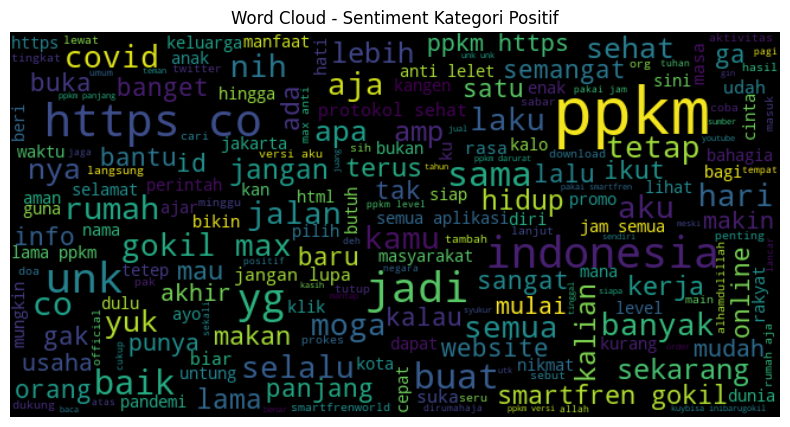

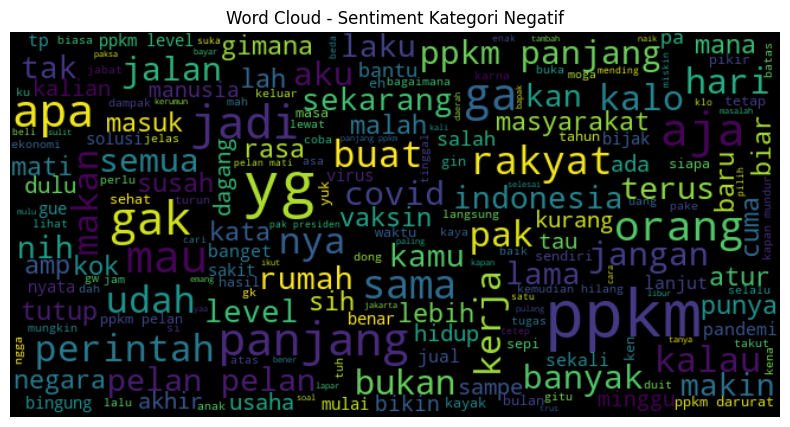

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds based on sentiment categories
sentiment_categories = df["sentiment"].unique()

for category in sentiment_categories:
    category_tokens = [
        word for tweets in df[df["sentiment"] == category]["tweet"] for word in tweets
    ]
    wordcloud = WordCloud(
       height=325
       
       
       ,width=650,background_color="black", max_font_size=55
    ).generate(" ".join(category_tokens))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    if category == 0:
        plt.title(f"Word Cloud - Sentiment Kategori Negatif")
    else:
        plt.title(f"Word Cloud - Sentiment Kategori Positif")
    plt.axis("off")
    plt.show()

- **Save To CSV**


In [22]:
# Menyimpan DataFrame ke dalam dataset baru
save_path = "../dataset/INA_TweetsPPKM_Preprocessed_DS2.csv"  # Path dan nama file untuk dataset baru
df.to_csv(
    save_path,  # Menyimpan DataFrame ke file CSV dengan path yang ditentukan
    index=False,  # Tidak menyertakan index saat menyimpan ke file
    header="true",  # Menyertakan header kolom saat menyimpan ke file
    encoding="utf-8",  # Menggunakan encoding UTF-8 untuk menyimpan teks Unicode
    sep="\t",  # Menggunakan "\t" sebagai pemisah antar kolom dalam file CSV
)

# Menampilkan informasi tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      7896 non-null   object
 1   sentiment  7896 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.5+ KB
